In [1]:
# Загрузка необходимых библиотек для анализа

from monitoring_utils import *

sns.set(style='darkgrid')

import warnings
warnings.filterwarnings("ignore")

In [2]:
# Загрузка сформированной выборки на мониторинге, обученной модели и калибровочной модели

df_test = pd.read_csv('df_test.csv')

print(df_test.shape)
    
with open('final_model.pkl', 'rb') as f:
    model = pickle.load(f)
    
with open('calib_model.pkl', 'rb') as f:
    calib = pickle.load(f)

(13012, 83)


In [3]:
# Приведение переменных в необходимый формат для предсказания вероятности клиентов

features = list(model.feature_names)
cat_features = model.cross_params['categorical_feature']
num_features = list(set(features)-set(cat_features))

for i in cat_features:
    df_test[i] = (df_test[i].astype('str').fillna('nan')+'_cat')
    
df_test['score'] = model.model.predict(df_test[features])

df_test['final_score'] = calib.predict(df_test['score'])

Количество единиц в df:  1500

Количество строк в df:  13012

Threshold by f1:  0.231981981981982

df
Recall@3903: 0.694
AP:  0.3497954394842703
MCC:  0.3228121531571393
F1:  0.4077952297847586
ROC-AUC:  0.8020433171183692
GINI:  0.6040866342367384
              precision    recall  f1-score   support

           0       0.93      0.89      0.91     11512
           1       0.36      0.47      0.41      1500

    accuracy                           0.84     13012
   macro avg       0.64      0.68      0.66     13012
weighted avg       0.86      0.84      0.85     13012



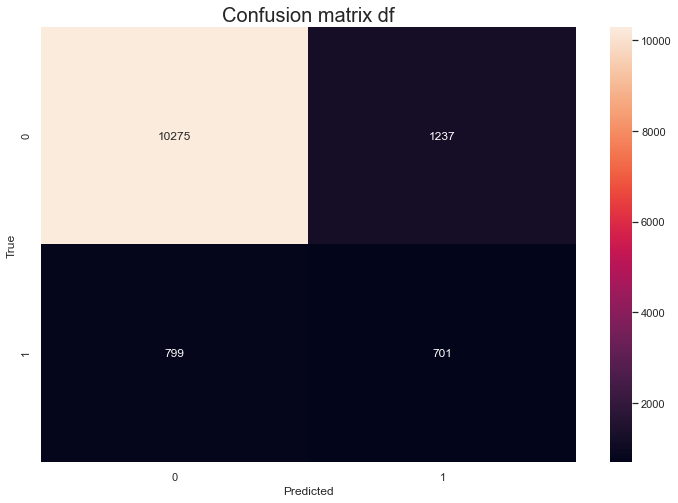

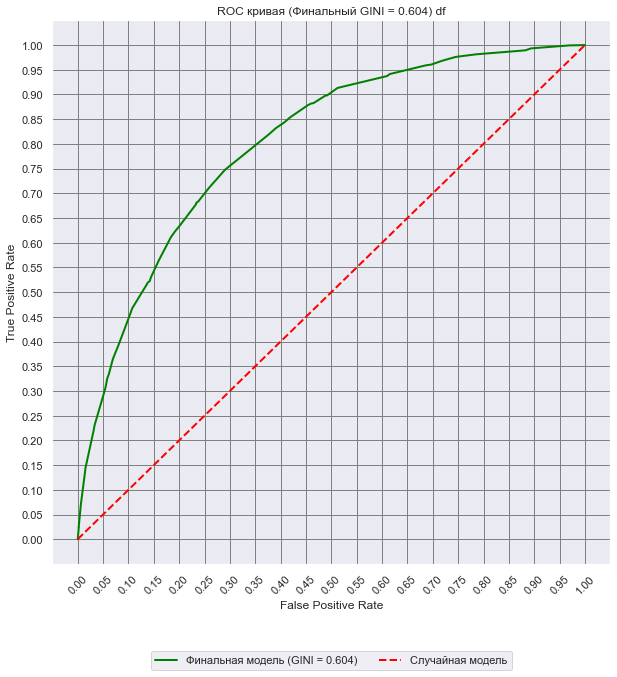

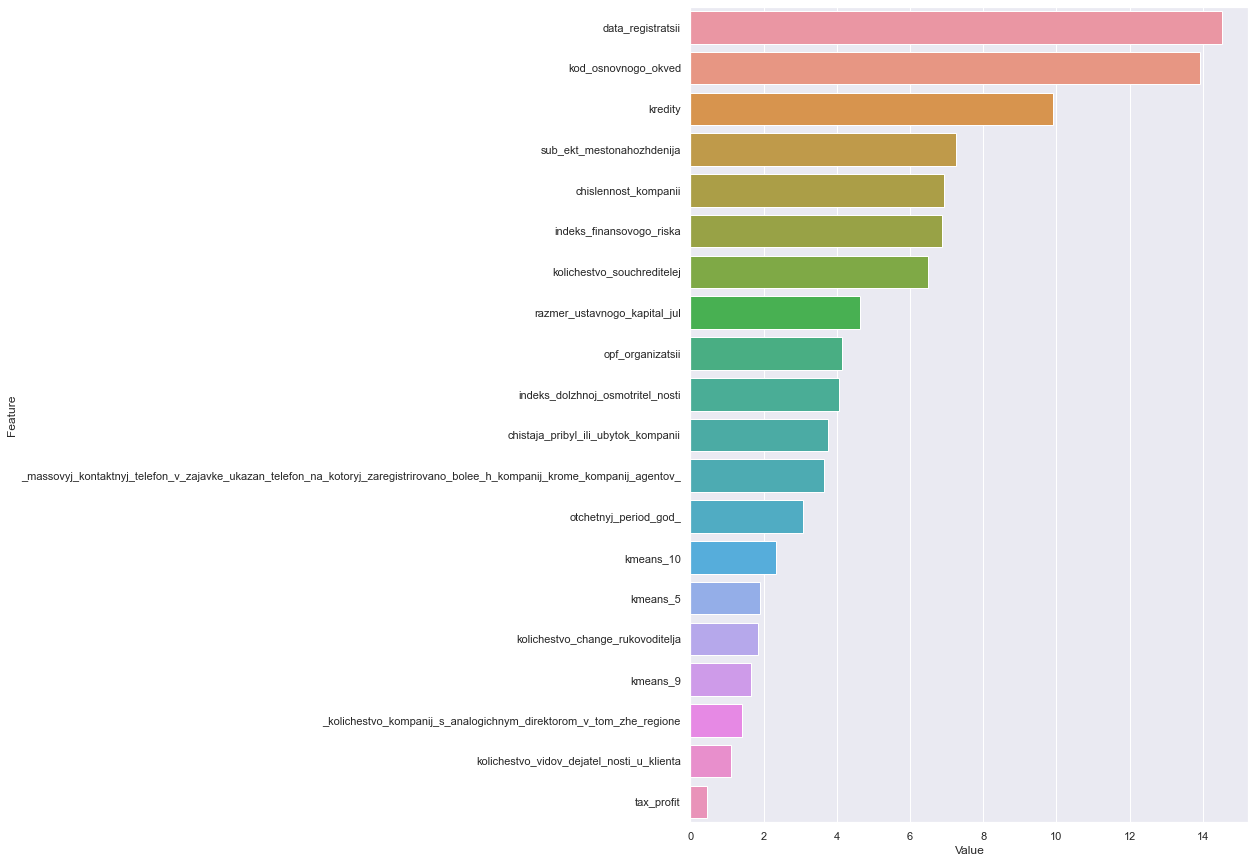

In [4]:
# При размеченных данных, проверка качества модели по финальной вероятности основных метрик, матрицы ошибок и Recall at 30%.

show_monitoring_metrics(df=df_test,
                        score='final_score',
                        target='target',
                        features=features,
                        model=model.model,
                        k=0.3)

In [ ]:
# Данный процесс может быть обернут в Pipeline. Если нет таргета, то мониторинг модели можно делать на
# данных распределения факторов и скорра